<a href="https://colab.research.google.com/github/Deepthi-Nadar/Sentimental-analysis-/blob/main/filpkart_sem_3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# **Filpkart Reviews**

---



# **Import packages**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Import dataset**

In [ ]:
data=pd.read_csv("flipkart_reviews.csv")
num_rows = data.shape[0]

# Print the result
print(f"Number of rows in the CSV file: {num_rows}")


Number of rows in the CSV file: 2304


# **checking null**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

Product_name    0
Review          0
Rating          0
dtype: int64


# **Understanding dataset**

In [ ]:
# Check the shape of the dataset (number of rows and columns)
print(data.shape)

# View column names
print(data.columns)

(2304, 3)
Index(['Product_name', 'Review', 'Rating'], dtype='object')


# **Datatype**

In [ ]:
print(data.dtypes)

Product_name    object
Review          object
Rating           int64
dtype: object


# **Clean the dataset**

In [ ]:
import nltk
import re

stemmer = nltk.SnowballStemmer("english")

def clean(text):
    text = str(text).lower()

    # Remove text within square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs (http, https, www)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove newlines
    text = re.sub('\n', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove emojis and other special characters
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # other symbols
                               u"\U000024C2-\U0001F251"  # enclosed characters
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove any remaining special characters except spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize, stem, and rejoin the text
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)

    return text

# Apply the cleaning function to the 'Review' column
data['Review'] = data['Review'].apply(clean)

print(data.head(5))


                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  best under great performancei got it for aroun...       5  
1                                        good perfom       5  
2  great perform but usual it has also that game ...       5  
3               my wife is so happi and best product       5  
4  light weight laptop with new amaz featur batte...       5  


In [ ]:
import pandas as pd
from google.colab import files

# Assuming 'data' is your cleaned DataFrame
data.to_csv("cleaned_reviews.csv", index=False)  # Save cleaned data to CSV

# Download the CSV file
files.download("cleaned_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Visulatize the ratings piechart**

In [ ]:
ratings =data["Rating"].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px
figure=px.pie(data, values=quantity, names=numbers, hole=0.5)

figure.show()

# **Sentiment Distribution**

Product_name    object
Review          object
Rating           int64
dtype: object


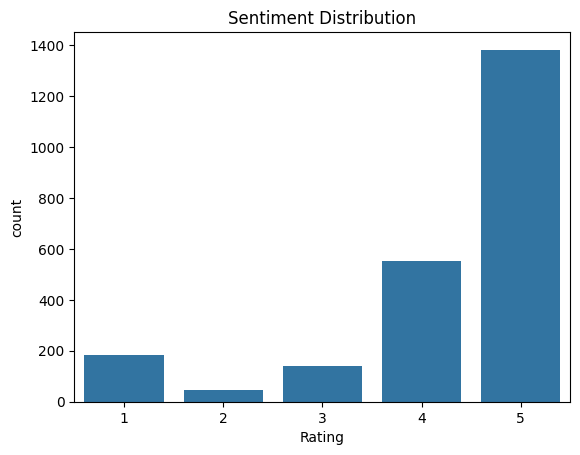

In [ ]:
print(data.dtypes)

sns.countplot(x='Rating', data=data)
plt.title('Sentiment Distribution')
plt.show()



# **Sentiment intensity analyser**

In [ ]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()

data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data=data[["Review", "Rating", "Positive", "Negative", "Neutral"]]
print(data.head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Rating  Positive  \
0  best under great performancei got it for aroun...       5     0.317   
1                                        good perfom       5     0.744   
2  great perform but usual it has also that game ...       5     0.139   
3               my wife is so happi and best product       5     0.389   
4  light weight laptop with new amaz featur batte...       5     0.000   
5    amaz laptop am so much happi thank for flipkart       5     0.257   
6              over all a good laptop for person use       5     0.326   
7                         thank you so much flipkart       4     0.385   
8                                       amaz product       5     0.000   
9  good for normal work student onlin class watch...       3     0.188   

   Negative  Neutral  
0     0.076    0.607  
1     0.000    0.256  
2     0.000    0.861  
3     0.000    0.611  
4     0.000    1.000  
5     0.000    0.743  
6     0.000    0.674  
7

# **Overall sentiment score**

In [ ]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")

sentiment_score(x,y,z)

Neutral


# **Why it is neutral**

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  732.4310000000019
Negative:  95.59900000000017
Neutral:  1475.9590000000003


# **Feature Engineering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Review']).toarray()


# **Encode the Target Variable**

In [ ]:
def sentiment_label(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        return "Positive"
    elif row['Negative'] > row['Positive'] and row['Negative'] > row['Neutral']:
        return "Negative"
    else:
        return "Neutral"

data['Sentiment_Label'] = data.apply(sentiment_label, axis=1)

print(data.head(15))


                                               Review  Rating  Positive  \
0   best under great performancei got it for aroun...       5     0.317   
1                                         good perfom       5     0.744   
2   great perform but usual it has also that game ...       5     0.139   
3                my wife is so happi and best product       5     0.389   
4   light weight laptop with new amaz featur batte...       5     0.000   
5     amaz laptop am so much happi thank for flipkart       5     0.257   
6               over all a good laptop for person use       5     0.326   
7                          thank you so much flipkart       4     0.385   
8                                        amaz product       5     0.000   
9   good for normal work student onlin class watch...       3     0.188   
10  laptop receiv was in good packag and good cond...       5     0.349   
11                                          veri nice       5     0.737   
12                     go

# **Split the Data**


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment_Label'], test_size=0.2, random_state=42)


# **Build a Machine Learning Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **Evaluate the Model**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.50      0.14      0.22         7
     Neutral       0.96      0.99      0.98       362
    Positive       0.95      0.86      0.90        92

    accuracy                           0.95       461
   macro avg       0.80      0.67      0.70       461
weighted avg       0.95      0.95      0.95       461

Accuracy:  0.9544468546637744


# **Visualize the Results**

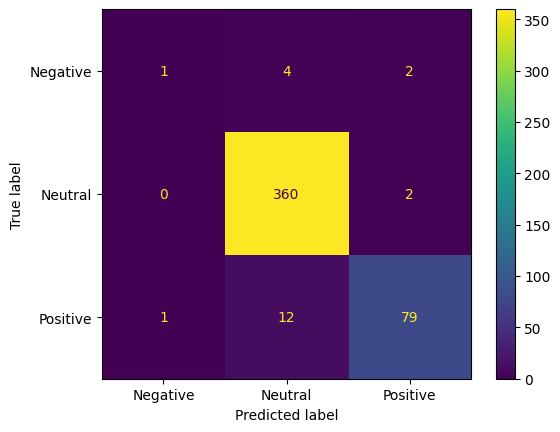

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters: ", grid.best_params_)


Best Parameters:  {'C': 10}


# **Accuracy**




In [ ]:
accuracy=accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Print the result formatted to 2 decimal places
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Accuracy: ",accuracy_score(y_test, y_pred))



Accuracy: 95.44%
Accuracy:  0.9544468546637744
